In [0]:
from textblob import TextBlob

In [0]:
import nltk

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
!pip install textblob_fr

     |████████████████████████████████| 563kB 2.8MB/s 


In [0]:
from textblob_fr import PatternTagger, PatternAnalyzer

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv("reviewfr.csv") 

In [7]:
data

,reviews,index
0,Déplorable déplorable déplorable pire service ...,0
1,l'un des points de restauration rapides le moi...,1
2,je ne comprends pas les avis négatifs ! On est...,2
3,Bonsoir commande borne n 80 ils ont servi jusq...,3
4,L'enseigne Mc Donald's est connue par beaucoup...,4
...,...,...
255,Joliment décorée à l'intérieur et la nourritur...,255
256,Nous y avons mangé sur notre première journée ...,256
257,La nourriture est identique dans tous les pays...,257
258,Je suis le ventilateur McDonald's et c'était l...,258


In [0]:
string=""

In [0]:
for review in data['reviews']:
    string=string+review

In [0]:
blob = TextBlob(string, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

In [0]:
words=blob.words

In [0]:
rows = []
i=0
for x in words: 
     rows.append([x, TextBlob(x, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment[0]])
     i=i+1


In [16]:
df = pd.DataFrame(rows, columns=["words", "polarity"])
print(df)

              words  polarity
0        Déplorable     -0.15
1        déplorable     -0.15
2        déplorable     -0.15
3              pire     -0.40
4           service      0.00
...             ...       ...
10856         chose      0.00
10857            de      0.00
10858        rapide      0.35
10859           sur      0.00
10860  l'aller.Plus      0.00

[10861 rows x 2 columns]


In [17]:
df

,words,polarity
0,Déplorable,-0.15
1,déplorable,-0.15
2,déplorable,-0.15
3,pire,-0.40
4,service,0.00
...,...,...
10856,chose,0.00
10857,de,0.00
10858,rapide,0.35
10859,sur,0.00


In [18]:
for i in range(len(df)):
    if df['polarity'][i]>0.70:
        
        print(df['words'][i])
    

parfait
indispensable
aimable
aimable
ami
aimable
idéal
ami
ami
aimable
aimable
aimable
parfait
idéal
Aimable
aimable


In [0]:
dfPos = df
dfNeg = df
dfPos = dfPos[(dfPos.polarity >= 0.7) ]
dfNeg = dfNeg[(dfNeg.polarity <= -0.7) ]

In [26]:
dfNeg

,words,polarity
301,mal,-0.70
396,mauvaise,-0.71
466,mal,-0.70
888,horrible,-1.00
948,terrible,-0.70
1081,déçus,-1.00
2001,déçu,-1.00
2967,mal,-0.70
3502,déçue,-1.00
3905,déçu,-1.00


In [27]:
import matplotlib.pyplot as plt
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 20
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

20.0
10.0


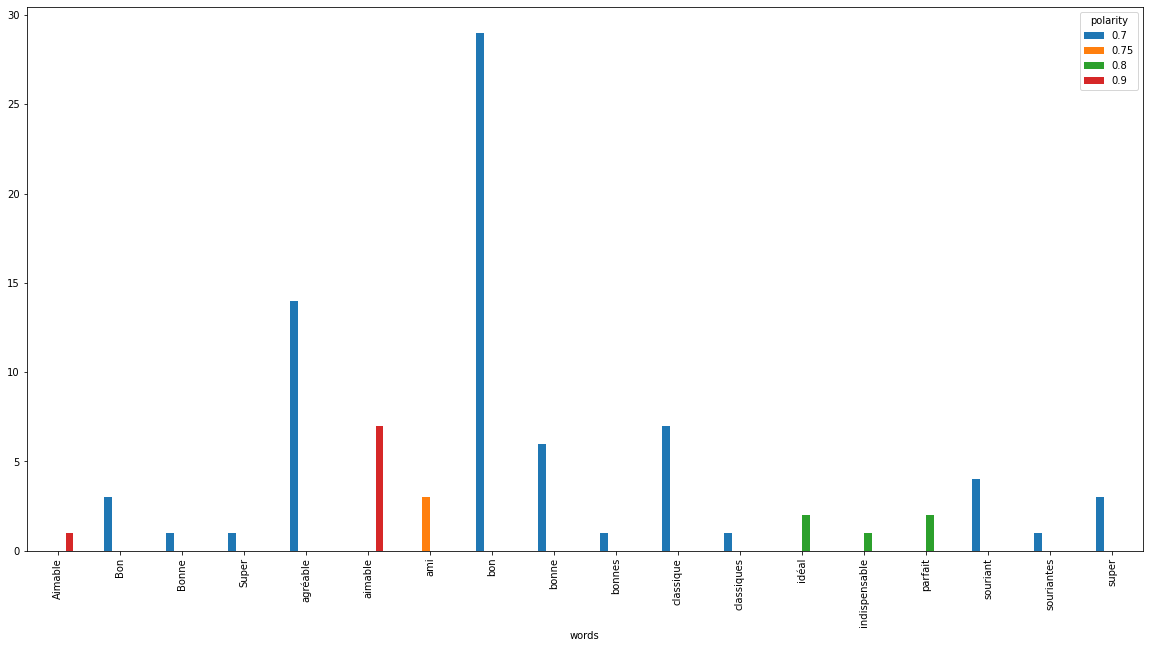

In [28]:
plt =  dfPos.groupby(['words', 'polarity']).polarity.count().unstack()
plt.plot(kind='bar')

In [29]:
import matplotlib.pyplot as plt
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 20
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

20.0
10.0


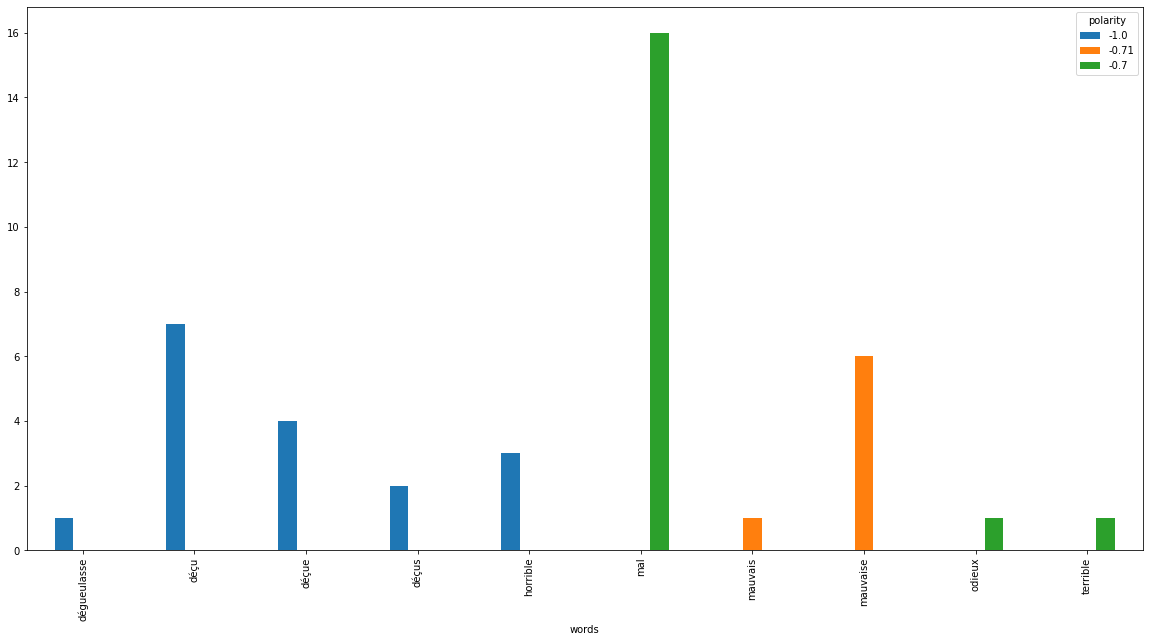

In [30]:
plt =  dfNeg.groupby(['words', 'polarity']).polarity.count().unstack()
plt.plot(kind='bar')